## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error as mse

In [3]:
import seaborn as sns

There is 1 csv file in the current version of the dataset:


### Let's check 1st file: /kaggle/input/MagicBricks.csv

In [4]:
nRowsRead = 1259

df1 = pd.read_csv('MagicBricks.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MagicBricks.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1259 rows and 11 columns


Let's take a quick look at what the data looks like:

In [5]:
df1.head(5)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [6]:
df1.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


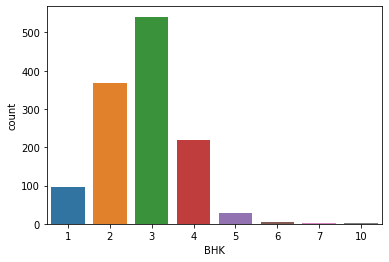

In [7]:
sns.countplot(df1['BHK'])

In [8]:
df1['BHK'].value_counts()

3     541
2     367
4     220
1      96
5      27
6       6
10      1
7       1
Name: BHK, dtype: int64

As, we can see,in the countplot and count_values there is only 1 property where 'BHK' is 7 and 10. And 6 rows have 6 'BHK'. These are some rare values that i don't want my model to train on. so the best option is to remove them from dataset.

In [9]:
df1[df1['BHK']==6]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
163,4050.0,6,3.0,Furnished,Budh Vihar Phase 1,1.0,5100000,Ready_to_move,Resale,Builder_Floor,1259.0
164,2400.0,6,4.0,Furnished,Budh Vihar Phase 2,1.0,6000000,Ready_to_move,Resale,Builder_Floor,2500.0
261,2800.0,6,4.0,Semi-Furnished,"Taimoor Enclave, New Friends Colony carpet are...",2.0,29500000,Ready_to_move,Resale,Apartment,15459.0
352,324.0,6,3.0,Furnished,"Yamuna Vihar, Shahdara",1.0,8700000,Ready_to_move,Resale,Builder_Floor,35714.0
353,720.0,6,5.0,Furnished,"Yamuna Vihar, Shahdara",1.0,22000000,Ready_to_move,Resale,Builder_Floor,35714.0
585,5500.0,6,7.0,Furnished,Safdarjung Enclave,1.0,160000000,Ready_to_move,Resale,Apartment,14818.0


In [10]:
df1.drop([721,345,163,164,261,352,353,585],inplace=True)  ##### these are indexes of rows, being removed from dataset

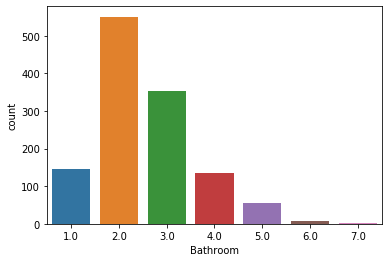

In [11]:
sns.countplot(df1['Bathroom'])

similarly, we are removing Bathrooms, where Bathrooms are 6 and 7

In [12]:
df1[df1['Bathroom']==6]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
225,5025.0,5,6.0,Unfurnished,Greater Kailash 2,4.0,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
495,5025.0,5,6.0,Unfurnished,Greater Kailash 2,4.0,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
527,810.0,5,6.0,Furnished,Geeta Colony,1.0,28900000,Ready_to_move,Resale,Apartment,6667.0
659,3050.0,5,6.0,Semi-Furnished,Commonwealth Games Village 2010,NaN,62500000,Ready_to_move,Resale,Apartment,20492.0
676,3112.0,5,6.0,Semi-Furnished,Commonwealth Games Village 2010,3.0,60000000,Ready_to_move,Resale,Apartment,19280.0
681,2300.0,5,6.0,Semi-Furnished,"Common Wealth Games Village, Commonwealth Game...",3.0,58000000,Ready_to_move,Resale,Apartment,21311.0
1211,4350.0,4,6.0,Semi-Furnished,"Orchid Metropolis, Hauz Khas",2.0,135000000,Ready_to_move,New_Property,Apartment,170000.0


In [13]:
df1[df1['Bathroom']==7]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
248,10350.0,4,7.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",3.0,160000000,Ready_to_move,New_Property,Apartment,15459.0
1029,5236.0,5,7.0,Unfurnished,"The Amaryllis, Karol Bagh",3.0,73700000,Almost_ready,New_Property,Apartment,14092.0


In [14]:
df1.drop([225,495,527,659,676,681,1211,248,1029],inplace=True)

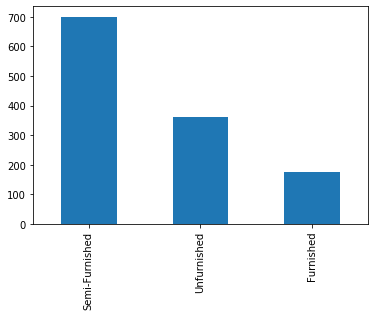

In [15]:
df1.Furnishing.value_counts().plot.bar()

This is pretty obvious, right?

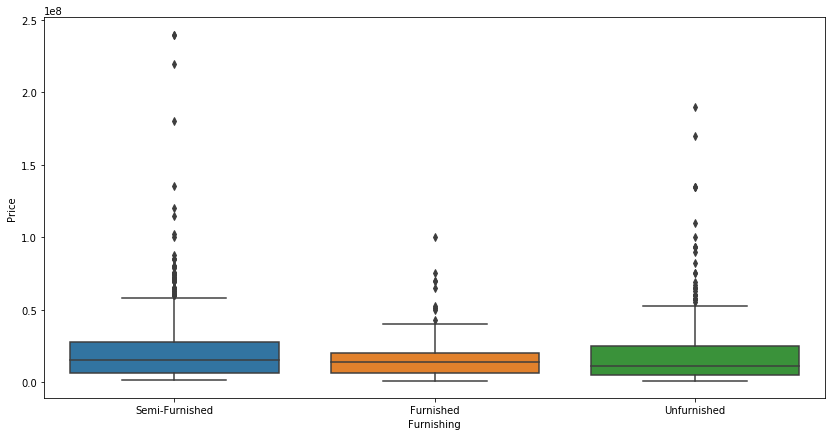

In [16]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df1.Furnishing,y=df1.Price)

In [17]:
df1.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         32
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       240
dtype: int64

33 Null values in Parking, which means, No Parking available in the apartment. so we can impute NAN by 0


In [18]:
df1.Parking.fillna(0,inplace=True)

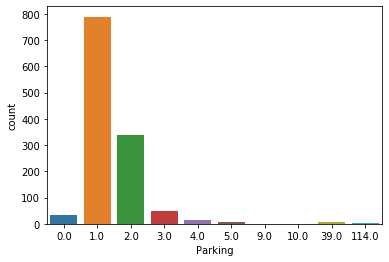

In [19]:
sns.countplot(df1.Parking)

wow, we've got 39 and 114 parking for some apartments, which is definitely an error. Now the problem is that we can not just remove all the rows we have , 'cause we already facing some serious shortage of data, removing them won't do any good. 


In [20]:
df1[df1.Parking==39]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
875,365.0,1,1.0,Unfurnished,Narela,39.0,3500000,Ready_to_move,Resale,Apartment,7143.0
876,390.0,1,1.0,Unfurnished,"DDA Lig Flats, Narela",39.0,2000000,Ready_to_move,Resale,Apartment,5128.0
877,350.0,1,1.0,Unfurnished,"DDA Flats Pocket 3, Narela",39.0,3000000,Ready_to_move,Resale,Apartment,5128.0
878,210.0,1,1.0,Semi-Furnished,"DDA Lig Flats, Narela",39.0,2000000,Ready_to_move,New_Property,Apartment,5128.0
879,50.0,1,1.0,Unfurnished,"DDA Lig Flats, Narela",39.0,3500000,Ready_to_move,New_Property,Apartment,5128.0
880,500.0,1,1.0,Unfurnished,"DDA Pocket H, Narela",39.0,1800000,Ready_to_move,Resale,Apartment,3600.0
881,350.0,1,1.0,Unfurnished,"DDA Lig Flats, Narela",39.0,1600000,Ready_to_move,Resale,Apartment,4571.0


These are DDA flats of Narela and price of each apartment is very low, and 39 must be the sum of all parkings available so we can safely assume every flat has one parking alloted. we are repalcing 39 as 1. similary 114 is the sum of all the parkings available,so we will replace 114 by 1.

In [21]:
df1['Parking'].replace([39,114],1,inplace=True)
df1['Parking'].replace([5,9,10],4,inplace=True)

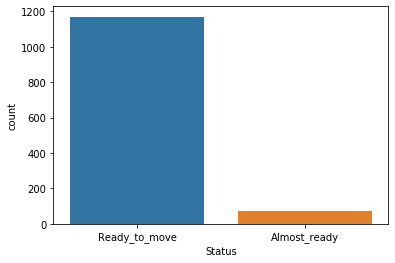

In [22]:
sns.countplot(df1.Status)

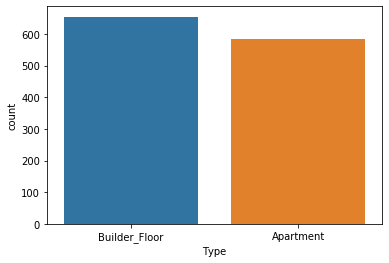

In [23]:
sns.countplot(df1['Type'])

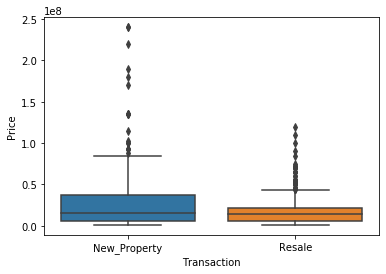

In [24]:
sns.boxplot(x=df1.Transaction,y=df1.Price)

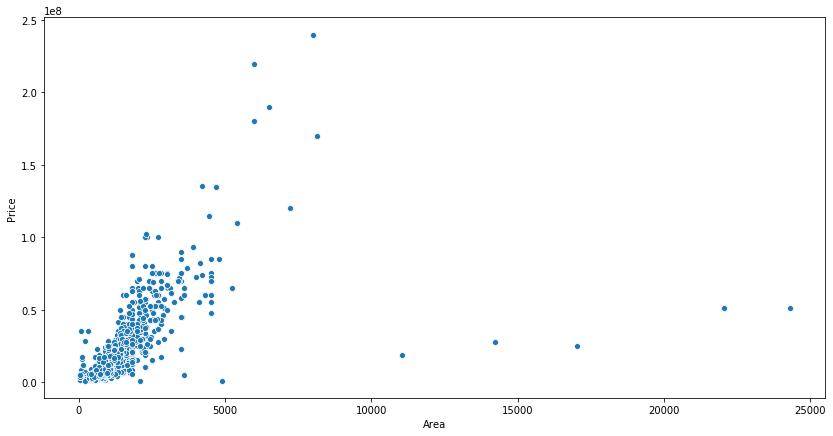

In [25]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df1.Area,y=df1.Price)

As, I anticipated there is a positive correlation between 'Area' and 'Price. 


And there is a definitely a relation between 'Area','Price' and 'Per_Sqft', which is
'Per_Sqft' = 'Price'/'Area'. 

**Multicolinearity : if two or more features(except target variable) are highly correlated on each other,this phenomena is known as multicolinearity. we don't want that to happen as it just create redundancy in dataset.**

so, we can eliminate one of the variable, as to make model less complex and that variable would be 'Per_Sqft' because it contains 240 NAN values.

In [26]:
df1.drop('Per_Sqft',axis=1,inplace=True)

In [27]:
df1.isnull().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
dtype: int64

Too many null values, we've got to impute them by mean, meadian or mode

In [28]:
df1.Bathroom.fillna(df1.Bathroom.median(),inplace=True)
df1.Type.fillna('Apartment',inplace=True)
df1.Furnishing.fillna('Semi-Furnished',inplace=True)

**So far, all good. 
Localities are essential for any property, infact after 'Area', 'locality' is the characteristic which matter most in property sale/purchase. for example:- if you are buying a house of area 200 sqft in locality like 'Seelampur' it may cost you about 2 Lac (say) 1000 Rs per square feet but on the contrary in 'Rohini' it may cost you 20 Lac, 10000 Rs per square feet.**

In [29]:
df1.Locality.unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

This is too messy. For the time being,I would remove this from dataset. I can't do anything with this feature right now. Always open to suggestions/feedback.

In [30]:
df1.drop('Locality',axis=1,inplace=True)

Before moving on, we need to convert all categorical(where data type is object) features into numerical features,because machine learning algorithm doesn't work on strings or other objects.
Here i am using one hot encoding , since we don't have too many category in a feature for example :- in 'Type' we have 'Apartment' and 'Builder-Floor'. so one-hot-encoding would be right choice.

In [31]:
df1 = pd.get_dummies(df1)


Normalization :- dividing every column by  maximum value of that column, to bring every no. in range of 0 and 1

In [32]:
for col in df1.columns:
    m = max(df1[col])
    df1[col] = df1[col]/m

In [33]:
df1

,Area,BHK,Bathroom,Parking,Price,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,0.032922,0.6,0.4,0.25,0.027083,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.030864,0.4,0.4,0.25,0.020833,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.039095,0.4,0.4,0.25,0.064583,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.024691,0.4,0.4,0.25,0.017500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.026749,0.4,0.4,0.25,0.025833,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,0.053498,0.8,0.6,0.25,0.064583,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,0.055556,0.8,0.6,0.25,0.041667,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,0.026749,0.4,0.4,0.25,0.016667,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,0.040535,0.6,0.6,0.25,0.028333,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
9,0.053498,0.8,0.8,0.25,0.062500,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [34]:
Y = df1.Price
X = df1.drop('Price',axis=1)

Dividing data in 80% training and 20% testing parts.usally i keep it 70 & 30.

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [36]:
x_train

,Area,BHK,Bathroom,Parking,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
1088,0.024691,0.6,0.4,0.25,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
96,0.065844,0.6,0.6,0.25,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1144,0.051440,0.6,0.6,0.50,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
896,0.002058,0.2,0.2,0.25,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
180,0.014403,0.2,0.2,0.25,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
31,0.032922,0.4,0.4,0.25,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
673,0.086626,0.6,0.6,0.50,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
936,0.037037,0.6,0.4,0.50,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
813,0.032922,0.6,0.6,0.25,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1167,0.057613,0.6,0.6,0.25,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


Using Linear Regression, my first choice for this project, Intiutive right?

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)   ########### traing model
pred = lr.predict(x_test) ########### Getting predictions

In [38]:
pred

array([ 0.09338379,  0.16235352,  0.12597656,  0.09924316,  0.09967041,
       -0.00537109, -0.02172852, -0.03057861,  0.04364014,  0.10675049,
        0.27838135,  0.07733154,  0.25598145,  0.0369873 ,  0.10040283,
        0.0536499 ,  0.15319824,  0.0289917 ,  0.0413208 ,  0.03338623,
        0.17919922, -0.03338623,  0.10107422,  0.20965576,  0.03662109,
        0.03137207,  0.10870361,  0.19903564,  0.17919922,  0.18981934,
        0.29943848,  0.12231445,  0.03887939,  0.02319336,  0.02923584,
        0.1953125 ,  0.043396  ,  0.10406494,  0.04473877,  0.02423096,
        0.03643799,  0.56408691,  0.04827881,  0.10327148,  0.17102051,
        0.11871338,  0.04199219,  0.0602417 ,  0.33679199,  0.12359619,
        0.2010498 ,  0.05151367,  0.12957764,  0.12841797,  0.05474854,
        0.05047607,  0.04016113,  0.11260986,  0.03662109,  0.0368042 ,
        0.03533936,  0.09820557,  0.03973389,  0.05688477, -0.02441406,
        0.02709961,  0.20355225,  0.08435059,  0.23248291,  0.04

In [39]:
from math import sqrt

In [40]:
print(sqrt(mse(y_test,pred)))  ######## Root Mean Square Error 

0.07274305212395671


Let's try Decision tree regressor

In [41]:
def DTR(x_train,y_train,x_test,y_test):
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print(sqrt(mse(y_test,pred)))

In [42]:
DTR(x_train,y_train,x_test,y_test)

0.05526332917008857


8 digit no. but less than the previous, we are making progress. i guess 

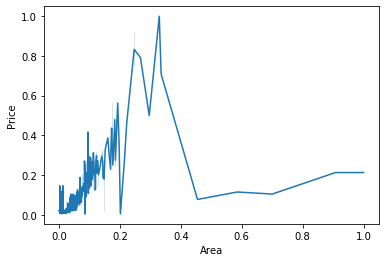

In [43]:
sns.lineplot(x=df1.Area,y=df1.Price)

Here, I want to remove some outliers, we'll see how does it affect RMSE

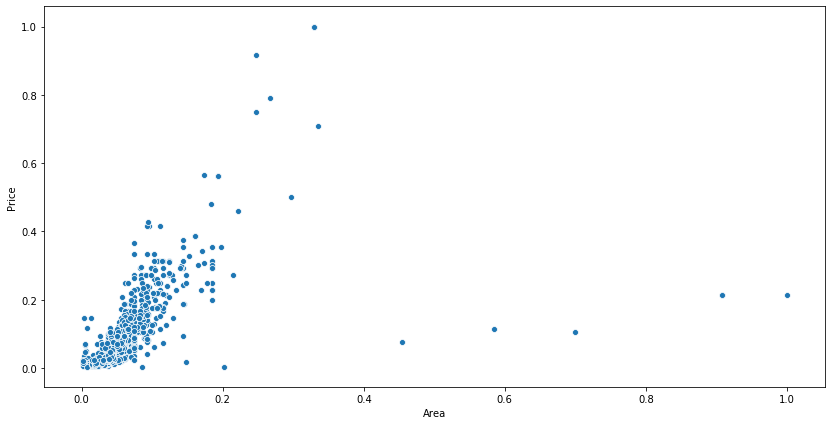

In [44]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df1.Area,y=df1.Price)

I'd like to get rid of all the 'Areas' greater than 0.3. 

In [45]:
p = np.array(df1[df1.Area>0.3].index)

In [46]:
df1.drop(p,inplace=True)  ##### these are indexes of rows, being removed from dataset

**Regression Plot**

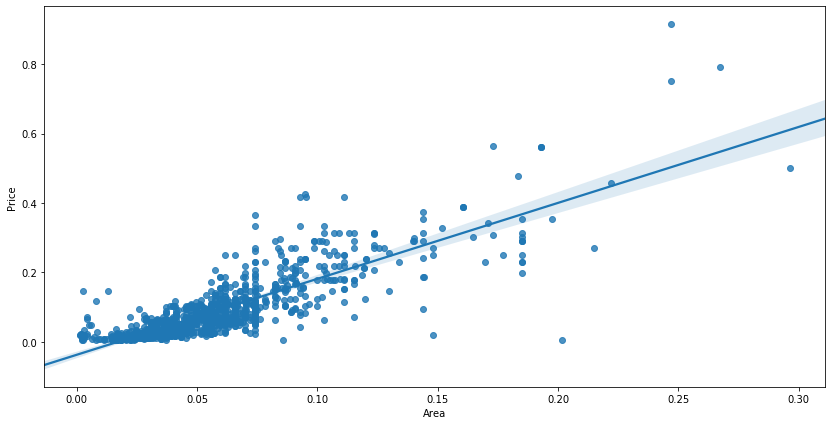

In [47]:
plt.figure(figsize=(14,7))
sns.regplot(x="Area", y="Price", data=df1)

In [48]:
Y = df1.Price
X = df1.drop('Price',axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
DTR(x_train,y_train,x_test,y_test)

0.0545463939825881


In [49]:
Y = df1.Price
X = df1.drop('Price',axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(sqrt(mse(y_test,pred)))

0.044696340207599244
